Gabor Sebestyen sba20333

                                    Machine Learning I/II CA3

Project goal: 

   The task we received for this project was to Implement a Linear regression and an Artificial Neural Network on a given dataset. Then to answer the question: “How accurately can we predict the mpg of a car?”, while comparing the contrast of the approaches of both models. Also, k-fold validation has to be applied and will need to discuss why k-fold validation is effective to generalize the Machine Learning modelling results.

Imported libraries, that were highly likely needed for my project.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import sklearn
%matplotlib inline
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from sklearn.datasets import make_regression, make_classification
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score
from sklearn.metrics import plot_confusion_matrix, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split, cross_val_score, KFold, StratifiedKFold, RepeatedKFold
from sklearn import metrics, preprocessing, tree, svm, linear_model, ensemble, model_selection                         
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LassoCV, RidgeCV
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor 
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, StandardScaler, LabelEncoder, scale
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from sklearn.feature_selection import SelectFromModel, RFE
import tensorflow as tf
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Activation
from tensorflow.python.keras.wrappers.scikit_learn import KerasRegressor
from numpy import where
from collections import Counter
import time
from matplotlib.pyplot import figure
from matplotlib.colors import ListedColormap  
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.models import Sequential
from imblearn.under_sampling import RandomUnderSampler, CondensedNearestNeighbour
from sklearn.compose import ColumnTransformer
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import sklearn.linear_model as skl_lm
from scipy import stats
from scipy.stats import zscore
from pandas import DataFrame
import warnings
from numpy.random import seed
from tensorflow.random import set_seed
warnings.filterwarnings('ignore')

Dataset origin: StatLib library which is maintained at Carnegie Mellon University; available at https://archive.ics.uci.edu/ml/datasets/auto+mpg

Dataset characteristics: multivariate
Associated task: regression
Number of instances: 398
Missing Attribute Values: horsepower has 6 missing values
Attribute characteristics: categorical, real
Number of attributes: 8

Attribute information:
    1. mpg: continuous (miles per gallon: indicates how far the car is able to travel with every gallon of fuel it is using (carwow.co.uk, n.d.))
    2. cylinders: multi-valued discrete (part of the engine, this is where the burn of the fuel is converted to mechanical energy (ArnoldClark Newsroom, n.d.))
    3. displacement: continuous (displacement, also referred as engine capacity is the cylinders combined volume (Math Study Strategies Learning Center Math for Automotives Displacement of a Piston, n.d.))
    4. horsepower: continuous (it is literally the power that the engine produces (Toyota Canada Inc, 2019))
    5. weight: continuous (car weight in pounds(lb) what is 0.453592kg)
    6. acceleration: continuous (acceleration is the rate in the change of the velocity as the function of the time (www.web-formulas.com, n.d.))
    7. model year: multi-valued discrete (the car model's year)
    8. origin: multi-valued discrete (coutry of origin: 1=US, 2=Europe, 3=Japan)
    9. car name: string (unique for each instance, brand and model)
    


  I started my project with EDA, to get an understanding of the dataset. I used the very first dataset we could download, what had only one column. Although there were other datasets available with separated columns I wanted to experiment with the task. (I have attached this dataset.)

Creating an array with my column name

In [2]:
col = ['data']

Reding in data with no header and allocating the previous array for the column name

In [3]:
df = pd.read_csv('auto-mpg.csv', header=0, names=col)

Making an observation on the dataset

In [4]:
df.head()

,data
0,15.0 8 350.0 165.0 3693. 11...
1,18.0 8 318.0 150.0 3436. 11...
2,16.0 8 304.0 150.0 3433. 12...
3,17.0 8 302.0 140.0 3449. 10...
4,15.0 8 429.0 198.0 4341. 10...


Data preparation:  

   I split the dataset to an appropriate number of columns, even I did an extra split to have the car brand in separate column, divided from the type. Initially there was a car name column what was giving 397 unique instances. With separating the brand and the model I could group the data with an additional aspect. 

In [5]:
df = df.data.str.split(expand=True,)

(Python and R Tips, 2018)

Observing results

In [6]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,15.0,8,350.0,165.0,3693.,11.5,70,1,"""buick",skylark,"320""",None,None,None
1,18.0,8,318.0,150.0,3436.,11.0,70,1,"""plymouth","satellite""",None,None,None,None
2,16.0,8,304.0,150.0,3433.,12.0,70,1,"""amc",rebel,"sst""",None,None,None
3,17.0,8,302.0,140.0,3449.,10.5,70,1,"""ford","torino""",None,None,None,None
4,15.0,8,429.0,198.0,4341.,10.0,70,1,"""ford",galaxie,"500""",None,None,None


Observing dataset info

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       397 non-null    object
 1   1       397 non-null    object
 2   2       397 non-null    object
 3   3       397 non-null    object
 4   4       397 non-null    object
 5   5       397 non-null    object
 6   6       397 non-null    object
 7   7       397 non-null    object
 8   8       397 non-null    object
 9   9       395 non-null    object
 10  10      196 non-null    object
 11  11      45 non-null     object
 12  12      3 non-null      object
 13  13      1 non-null      object
dtypes: object(14)
memory usage: 43.5+ KB


Creating array with the new column names

In [8]:
cols = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year', 'origin', 'car_brand', 'car_model', 'a', 'b', 'c', 'd']

Summarizing null values per columns

In [9]:
df.isnull().sum()

0       0
1       0
2       0
3       0
4       0
5       0
6       0
7       0
8       0
9       2
10    201
11    352
12    394
13    396
dtype: int64

Assigning the array of column names to the dataset

In [10]:
df.columns = cols

Observing results

In [11]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_brand,car_model,a,b,c,d
0,15.0,8,350.0,165.0,3693.,11.5,70,1,"""buick",skylark,"320""",None,None,None
1,18.0,8,318.0,150.0,3436.,11.0,70,1,"""plymouth","satellite""",None,None,None,None
2,16.0,8,304.0,150.0,3433.,12.0,70,1,"""amc",rebel,"sst""",None,None,None
3,17.0,8,302.0,140.0,3449.,10.5,70,1,"""ford","torino""",None,None,None,None
4,15.0,8,429.0,198.0,4341.,10.0,70,1,"""ford",galaxie,"500""",None,None,None


Filling null values with empty strings

In [12]:
df['a'].fillna(' ', inplace = True)
df['b'].fillna(' ', inplace = True)
df['c'].fillna(' ', inplace = True)
df['d'].fillna(' ', inplace = True)

Observing result

In [13]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_brand,car_model,a,b,c,d
0,15.0,8,350.0,165.0,3693.,11.5,70,1,"""buick",skylark,"320""",,,
1,18.0,8,318.0,150.0,3436.,11.0,70,1,"""plymouth","satellite""",,,,
2,16.0,8,304.0,150.0,3433.,12.0,70,1,"""amc",rebel,"sst""",,,
3,17.0,8,302.0,140.0,3449.,10.5,70,1,"""ford","torino""",,,,
4,15.0,8,429.0,198.0,4341.,10.0,70,1,"""ford",galaxie,"500""",,,


Replacing unwanted characters with empty strings

In [14]:
df['car_brand'] = df['car_brand'].str.replace('"','')
df['weight'] = df['weight'].str.replace('.','')
df['horsepower'] = df['horsepower'].str.replace('?','')

(datatofish.com, n.d.)

Observing results

In [15]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_brand,car_model,a,b,c,d
0,15.0,8,350.0,165.0,3693,11.5,70,1,buick,skylark,"320""",,,
1,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth,"satellite""",,,,
2,16.0,8,304.0,150.0,3433,12.0,70,1,amc,rebel,"sst""",,,
3,17.0,8,302.0,140.0,3449,10.5,70,1,ford,"torino""",,,,
4,15.0,8,429.0,198.0,4341,10.0,70,1,ford,galaxie,"500""",,,


Dropping unwanted columns

In [16]:
df.drop(df.columns[[9, 10, 11, 12, 13]], axis=1, inplace=True)

Observing results

In [17]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_brand
0,15.0,8,350.0,165.0,3693,11.5,70,1,buick
1,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth
2,16.0,8,304.0,150.0,3433,12.0,70,1,amc
3,17.0,8,302.0,140.0,3449,10.5,70,1,ford
4,15.0,8,429.0,198.0,4341,10.0,70,1,ford


Observing new dataset info

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   mpg           397 non-null    object
 1   cylinders     397 non-null    object
 2   displacement  397 non-null    object
 3   horsepower    397 non-null    object
 4   weight        397 non-null    object
 5   acceleration  397 non-null    object
 6   model_year    397 non-null    object
 7   origin        397 non-null    object
 8   car_brand     397 non-null    object
dtypes: object(9)
memory usage: 28.0+ KB


Observing dataset shape

In [19]:
df.shape

(397, 9)

Converting data to numeric type (both linear regression and ann models accepting only numeric type data).

In [20]:
df['mpg'] = pd.to_numeric(df['mpg'])
df['cylinders'] = pd.to_numeric(df['cylinders'])
df['displacement'] = pd.to_numeric(df['displacement'])
df['horsepower'] = pd.to_numeric(df['horsepower'])
df['weight'] = pd.to_numeric(df['weight'])
df['acceleration'] = pd.to_numeric(df['acceleration'])
df['model_year'] = pd.to_numeric(df['model_year'])
df['origin'] = pd.to_numeric(df['origin'])

Observing results

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           397 non-null    float64
 1   cylinders     397 non-null    int64  
 2   displacement  397 non-null    float64
 3   horsepower    391 non-null    float64
 4   weight        397 non-null    int64  
 5   acceleration  397 non-null    float64
 6   model_year    397 non-null    int64  
 7   origin        397 non-null    int64  
 8   car_brand     397 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 28.0+ KB


Using LabelEncoder to prepare features for my models.

In [22]:
lb_make = LabelEncoder()
df['car_brand'] = lb_make.fit_transform(df['car_brand'])
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_brand
0,15.0,8,350.0,165.0,3693,11.5,70,1,3
1,18.0,8,318.0,150.0,3436,11.0,70,1,25
2,16.0,8,304.0,150.0,3433,12.0,70,1,0
3,17.0,8,302.0,140.0,3449,10.5,70,1,13
4,15.0,8,429.0,198.0,4341,10.0,70,1,13


Observing dataset info

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           397 non-null    float64
 1   cylinders     397 non-null    int64  
 2   displacement  397 non-null    float64
 3   horsepower    391 non-null    float64
 4   weight        397 non-null    int64  
 5   acceleration  397 non-null    float64
 6   model_year    397 non-null    int64  
 7   origin        397 non-null    int64  
 8   car_brand     397 non-null    int32  
dtypes: float64(4), int32(1), int64(4)
memory usage: 26.5 KB


Creating boxplots with stripplot to visualize the distribution of the selected features

Other than visualizing statistical properties of the given variable, we also able to see outliers and data skewness with boxplot. Skewness and outliers are very important information, as this can affect models, especially the regression ones. Also, linear models are more sensitive as they more accurate working with the normally distributed data (Rajat Sharma, 2019).

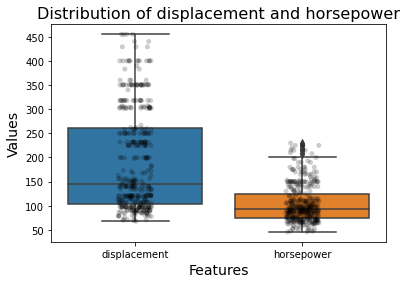

In [24]:
df_p = pd.DataFrame(data=df, columns=["displacement", "horsepower"])
boxplot = sns.boxplot(x="variable", y="value", data=pd.melt(df), order=["displacement", "horsepower"])
boxplot = sns.stripplot(x="variable", y="value", data=pd.melt(df), marker="o", alpha=0.2, color="black", order=["displacement", "horsepower"])
boxplot.axes.set_title("Distribution of displacement and horsepower", fontsize=16)
boxplot.set_xlabel("Features", fontsize=14)
boxplot.set_ylabel("Values", fontsize=14)
plt.show()

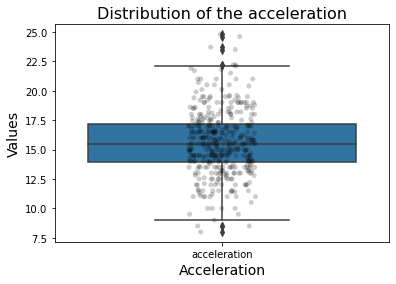

In [25]:
df_p = pd.DataFrame(data=df, columns=["acceleration"])
boxplot = sns.boxplot(x="variable", y="value", data=pd.melt(df), order=["acceleration"])
boxplot = sns.stripplot(x="variable", y="value", data=pd.melt(df), marker="o", alpha=0.2, color="black", order=["acceleration"])
boxplot.axes.set_title("Distribution of the acceleration", fontsize=16)
boxplot.set_xlabel("Acceleration", fontsize=14)
boxplot.set_ylabel("Values", fontsize=14)
plt.show()

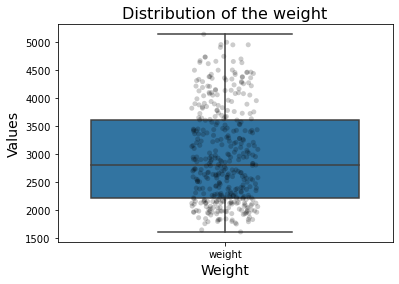

In [26]:
df_p = pd.DataFrame(data=df, columns=["weight"])
boxplot = sns.boxplot(x="variable", y="value", data=pd.melt(df), order=["weight"])
boxplot = sns.stripplot(x="variable", y="value", data=pd.melt(df), marker="o", alpha=0.2, color="black", order=["weight"])
boxplot.axes.set_title("Distribution of the weight", fontsize=16)
boxplot.set_xlabel("Weight", fontsize=14)
boxplot.set_ylabel("Values", fontsize=14)
plt.show()

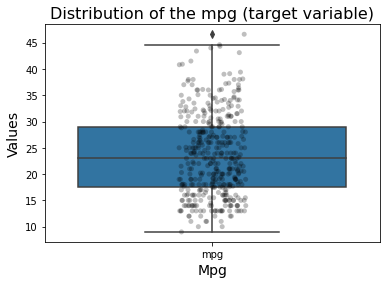

In [27]:
df_p = pd.DataFrame(data=df, columns=["mpg"])
boxplot = sns.boxplot(x="variable", y="value", data=pd.melt(df), order=["mpg"])
boxplot = sns.stripplot(x="variable", y="value", data=pd.melt(df), marker="o", alpha=0.25, color="black", order=["mpg"])
boxplot.axes.set_title("Distribution of the mpg (target variable)", fontsize=16)
boxplot.set_xlabel("Mpg", fontsize=14)
boxplot.set_ylabel("Values", fontsize=14)
plt.show()

(Nelson D., 2021)

Making an observation on the boxplots we can make a conclusion it is a real-life dataset, as most of the variables are skewed. Only one observed variable shows normal distribution, which is the “acceleration”, however in the other hand this variable has the most outliers indicated. Most of the other variables are positively skewed, except the target variable which is showing a smaller negative skew. 

Making an observation on the statistical information of the variables

In [28]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_brand
count,397.000000,397.000000,397.000000,391.000000,397.000000,397.000000,397.000000,397.000000,397.000000
mean,23.528463,5.448363,193.139798,104.404092,2969.080605,15.577078,76.025189,1.574307,15.863980
std,7.820926,1.698329,104.244898,38.518732,847.485218,2.755326,3.689922,0.802549,10.162152
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000,0.000000
25%,17.500000,4.000000,104.000000,75.000000,2223.000000,13.900000,73.000000,1.000000,7.000000
50%,23.000000,4.000000,146.000000,93.000000,2800.000000,15.500000,76.000000,1.000000,13.000000
75%,29.000000,8.000000,262.000000,125.000000,3609.000000,17.200000,79.000000,2.000000,25.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000,36.000000


Both boxplots and the describe function indicated outliers in the dataset. I had 2 different approaches to remove these outliers. The reason of having had 2 ways is that after using a code what was based on the Z-score, I was expecting more outliers to be removed and that the shape of the dataset would be more affected. Therefore, I used another code based on Standard deviation. Both approaches based on similar concept, as Z-score is literally indicating the value of difference from the standard deviation in both ways and the Standard deviation is reflecting the variability amount within the dataset. 

Observing shape of dataset

In [29]:
df.shape

(397, 9)

Removing outliers from weight feature

In [30]:
df= df[np.abs(df.weight-df.weight.mean()) <= (3*df.weight.std())]

In [31]:
df.shape

(397, 9)

Second method of outlier removal from same feature 

In [32]:
df = df[(np.abs(stats.zscore(df['weight'])) < 3)]

In [33]:
df.shape

(397, 9)

Removing outliers from acceleration feature

In [34]:
df= df[np.abs(df.acceleration-df.acceleration.mean()) <= (3*df.acceleration.std())]

In [35]:
df.shape

(395, 9)

Second method of outlier removal from same feature

In [36]:
df = df[(np.abs(stats.zscore(df['acceleration'])) < 3)]

In [37]:
df.shape

(394, 9)

Removing outliers from displacement feature

In [38]:
df= df[np.abs(df.displacement-df.displacement.mean()) <= (3*df.displacement.std())]

In [39]:
df.shape

(394, 9)

Second method of outlier removal from same feature

In [40]:
df = df[(np.abs(stats.zscore(df['displacement'])) < 3)]

In [41]:
df.shape

(394, 9)

Removing outliers from mpg target variable

In [42]:
df= df[np.abs(df.mpg-df.mpg.mean()) <= (3*df.mpg.std())]

In [43]:
df.shape

(393, 9)

Second method of outlier removal from target variable

In [44]:
df = df[(np.abs(stats.zscore(df['mpg'])) < 3)]

In [45]:
df.shape

(393, 9)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 393 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           393 non-null    float64
 1   cylinders     393 non-null    int64  
 2   displacement  393 non-null    float64
 3   horsepower    387 non-null    float64
 4   weight        393 non-null    int64  
 5   acceleration  393 non-null    float64
 6   model_year    393 non-null    int64  
 7   origin        393 non-null    int64  
 8   car_brand     393 non-null    int32  
dtypes: float64(4), int32(1), int64(4)
memory usage: 29.2 KB


Observation of the distribution and relations of the features.

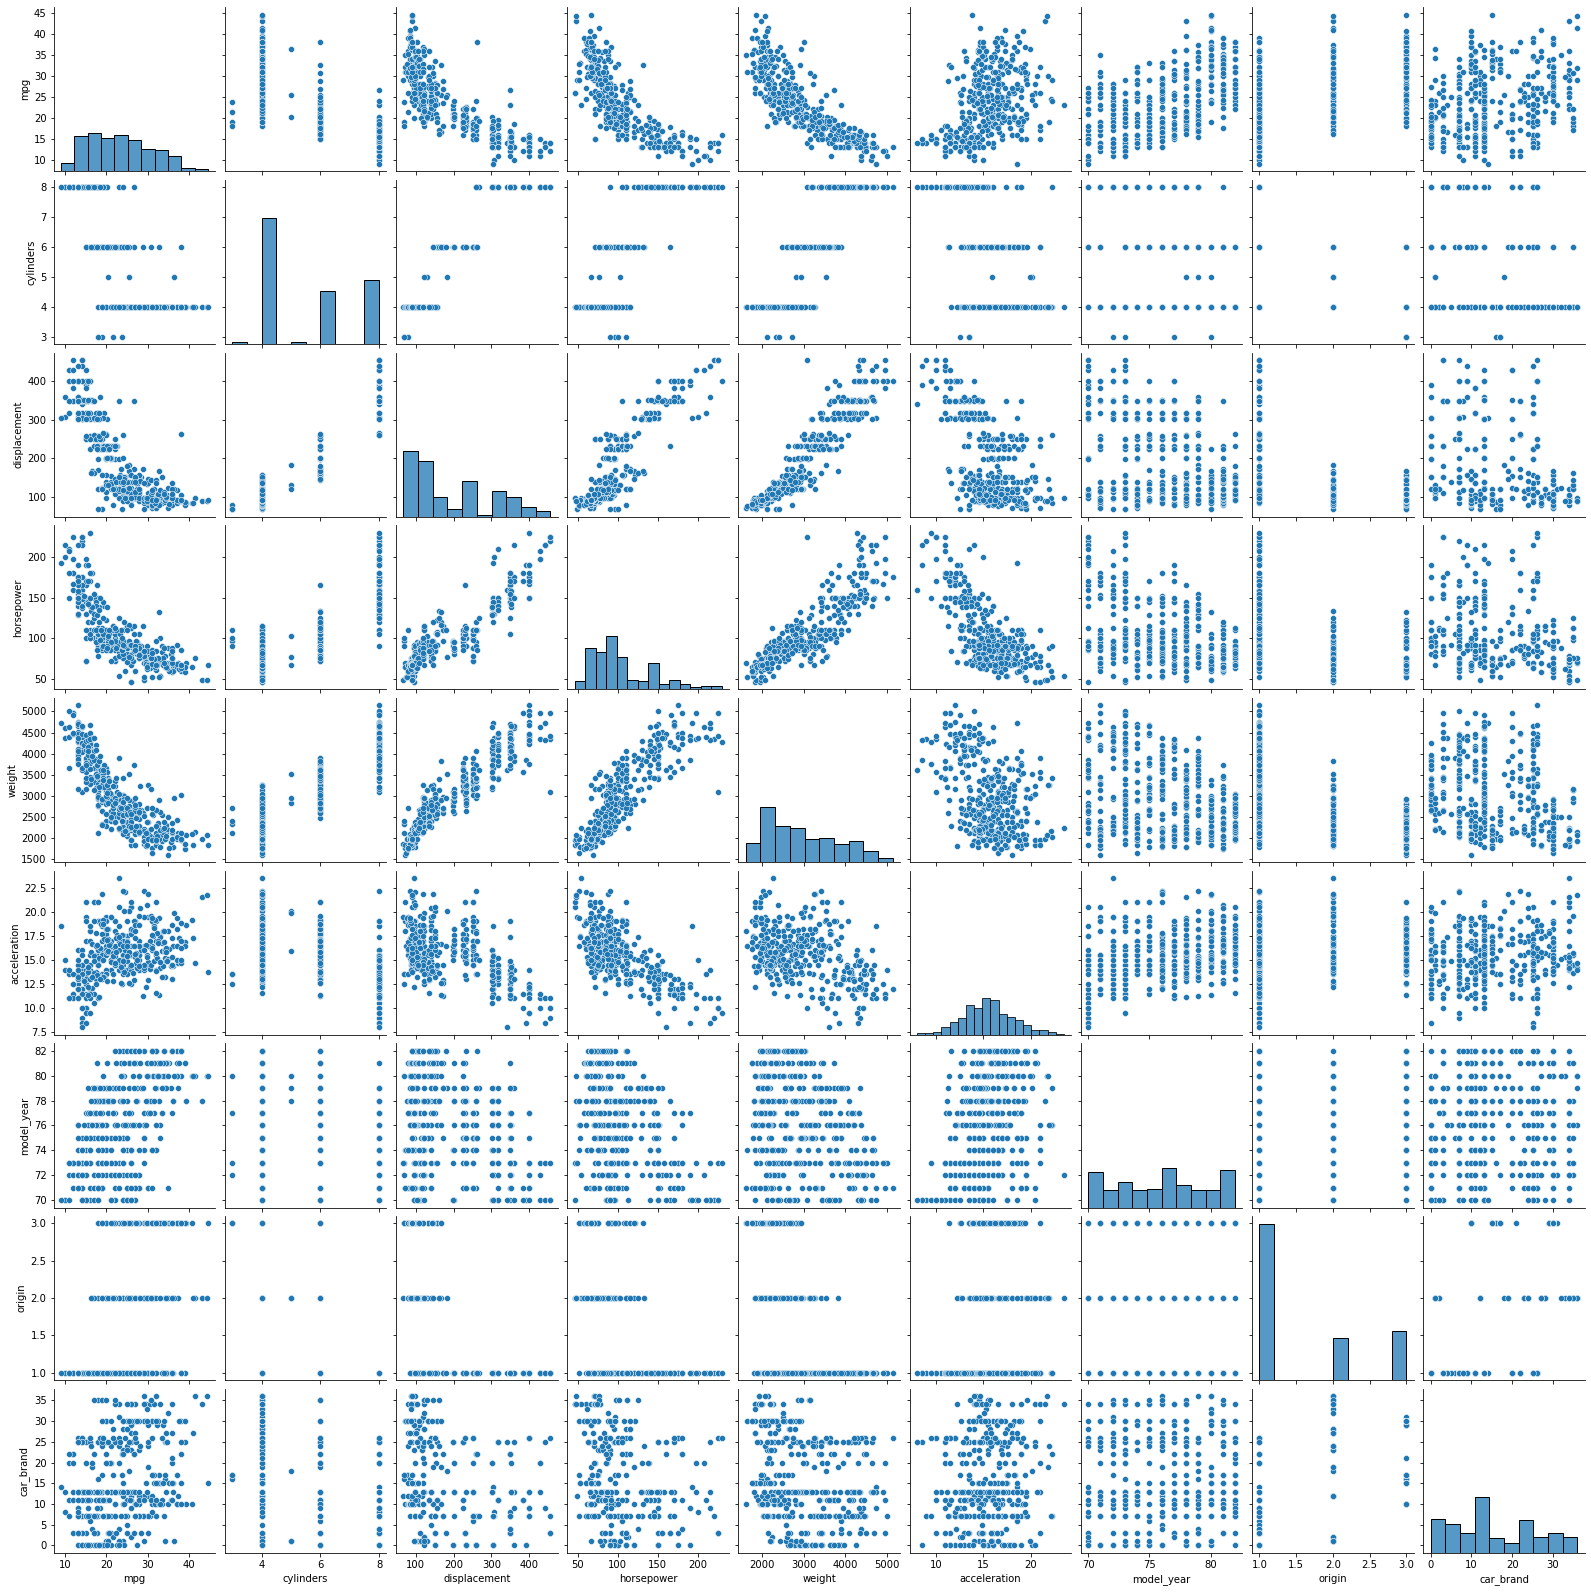

In [47]:
sns.pairplot(df)

Dropping observations with missin values

In [48]:
df = df.dropna()
df = df.reset_index(drop=True)

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 387 entries, 0 to 386
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           387 non-null    float64
 1   cylinders     387 non-null    int64  
 2   displacement  387 non-null    float64
 3   horsepower    387 non-null    float64
 4   weight        387 non-null    int64  
 5   acceleration  387 non-null    float64
 6   model_year    387 non-null    int64  
 7   origin        387 non-null    int64  
 8   car_brand     387 non-null    int32  
dtypes: float64(4), int32(1), int64(4)
memory usage: 25.8 KB


After cleaning the dataset, I created numerous catplots, to visualize the distribution of the dataset with different aspects. Although we cannot generalize due to the small size of the datasets and the uneven distribution of the features in question, however I could make some conclusions regarding the given patterns within the dataset. 

   Although there is not an even number of the observations with regards of the car brands, I decided to create a plot to see what brand has the highest mpg level according to this dataset. It clearly pointed out that VW has the highest and Hi has the lowest.

(before the above observations could be done, the car_brand column had to re transformed back from numeric, so we are able to see the original state)

In [50]:
df['car_brand'] = lb_make.inverse_transform(df['car_brand'])

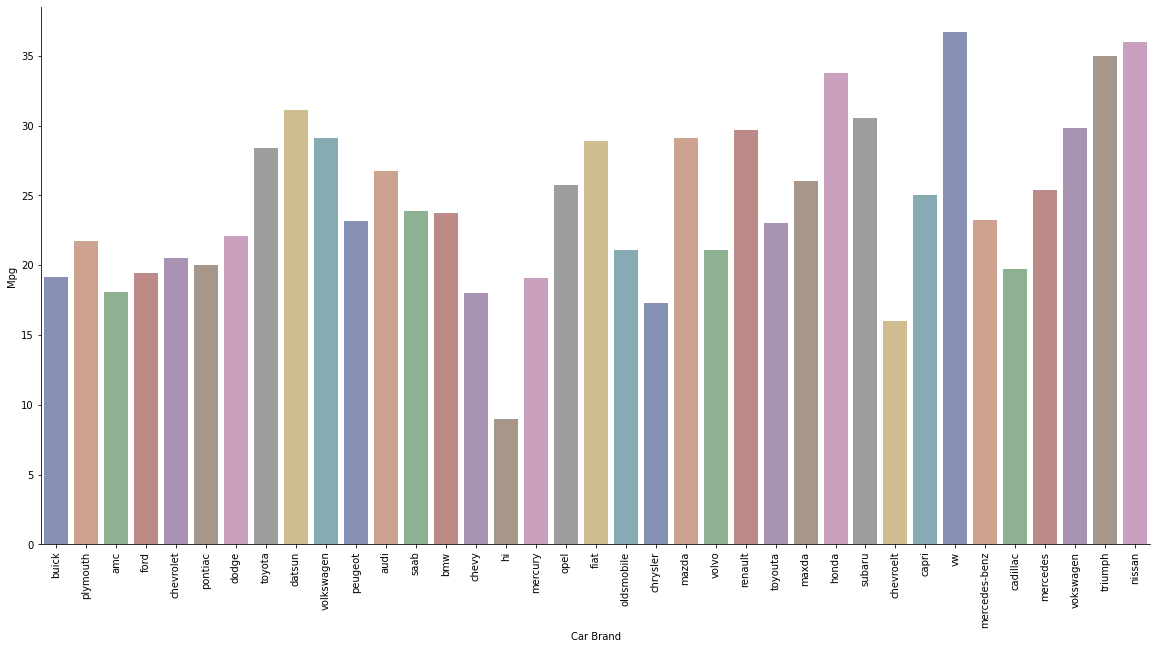

In [51]:
m = sns.catplot(x='car_brand', y='mpg', data=df, kind="bar", ci=None, palette="dark", aspect=2, alpha=.5, height=8)
m.set_axis_labels("Car Brand", "Mpg")
m.set_xticklabels(rotation=90)

Printing the number of instances for each unique models

In [52]:
df['car_brand'].value_counts()

ford             48
chevrolet        42
plymouth         31
dodge            28
amc              27
toyota           25
datsun           23
buick            17
pontiac          16
volkswagen       15
honda            13
mercury          11
oldsmobile       10
mazda             9
fiat              8
audi              7
peugeot           7
chrysler          6
volvo             6
saab              4
subaru            4
vw                4
opel              4
renault           3
chevy             3
cadillac          2
mercedes-benz     2
bmw               2
maxda             2
capri             1
mercedes          1
chevroelt         1
toyouta           1
triumph           1
vokswagen         1
nissan            1
hi                1
Name: car_brand, dtype: int64

The next observation was regarding the number of cylinders, were there was a clear indication that the vehicles with 4 cylinders have the highest and those with 8 cylinders have the lowest mpg. We also may suggest that the mpg is inversely proportional with the number of cylinders.

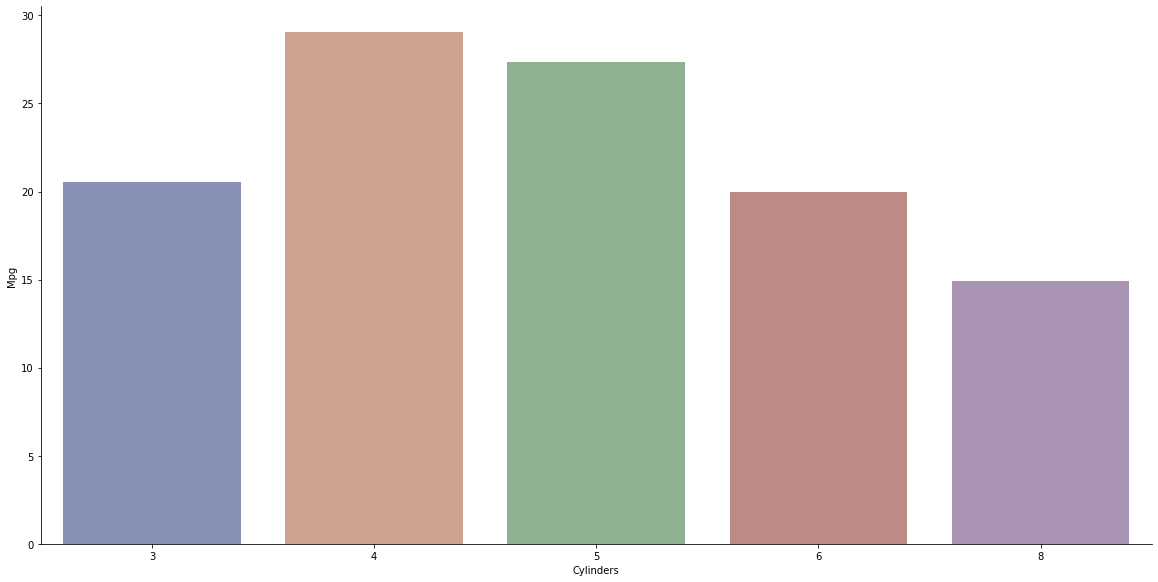

In [53]:
m = sns.catplot(x='cylinders', y='mpg', data=df, kind="bar", ci=None, palette="dark", aspect=2, alpha=.5, height=8)
m.set_axis_labels("Cylinders", "Mpg")

Printing the number of instances for each unique cylinders

In [54]:
df['cylinders'].value_counts()

4    195
8    102
6     83
3      4
5      3
Name: cylinders, dtype: int64

Although there are some outliers with regards my observation, however the below plot shows that the rate of mpg is directly proportional with the year of the models.

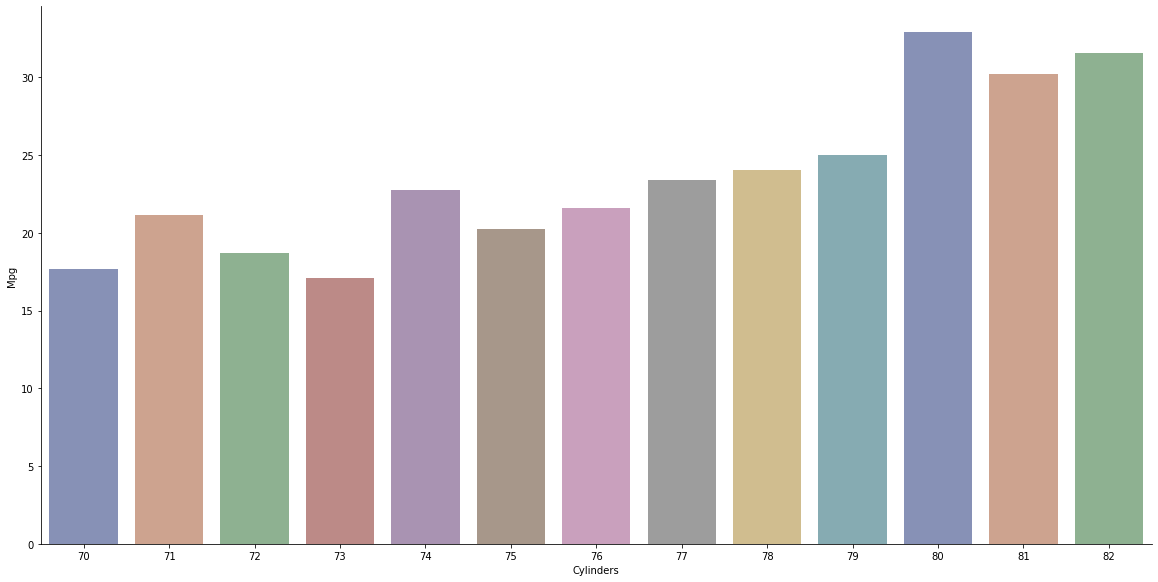

In [55]:
m = sns.catplot(x='model_year', y='mpg', data=df, kind="bar", ci=None, palette="dark", aspect=2, alpha=.5, height=8)
m.set_axis_labels("Cylinders", "Mpg")

Printing the number of instances for each unique model year

In [56]:
df['model_year'].value_counts()

73    40
78    36
76    34
75    30
82    29
81    28
79    28
77    28
72    28
70    28
71    27
74    26
80    25
Name: model_year, dtype: int64

The number of observations is not even with regards to the observations for each unique origin; however, the below plot shows that in this dataset the number 3 origin (Japan) gives the highest mpg rate and origin 1 (US) is the lowest.

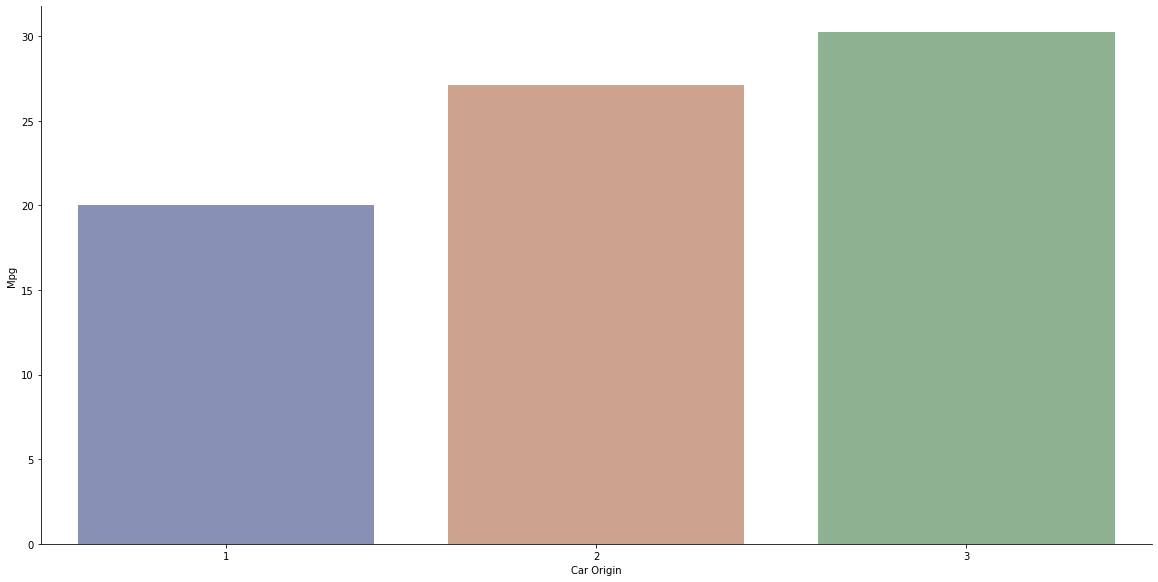

In [57]:
m = sns.catplot(x='origin', y='mpg', data=df, kind="bar", ci=None, palette="dark", aspect=2, alpha=.5, height=8)
m.set_axis_labels("Car Origin", "Mpg")

Printing the number of instances for each unique origin

In [58]:
df['origin'].value_counts()

1    244
3     78
2     65
Name: origin, dtype: int64

There are some outliers with regards to the observed pattern, however making an observation on the above plot shows the rate of the mpg is inversely proportional with the horsepower.

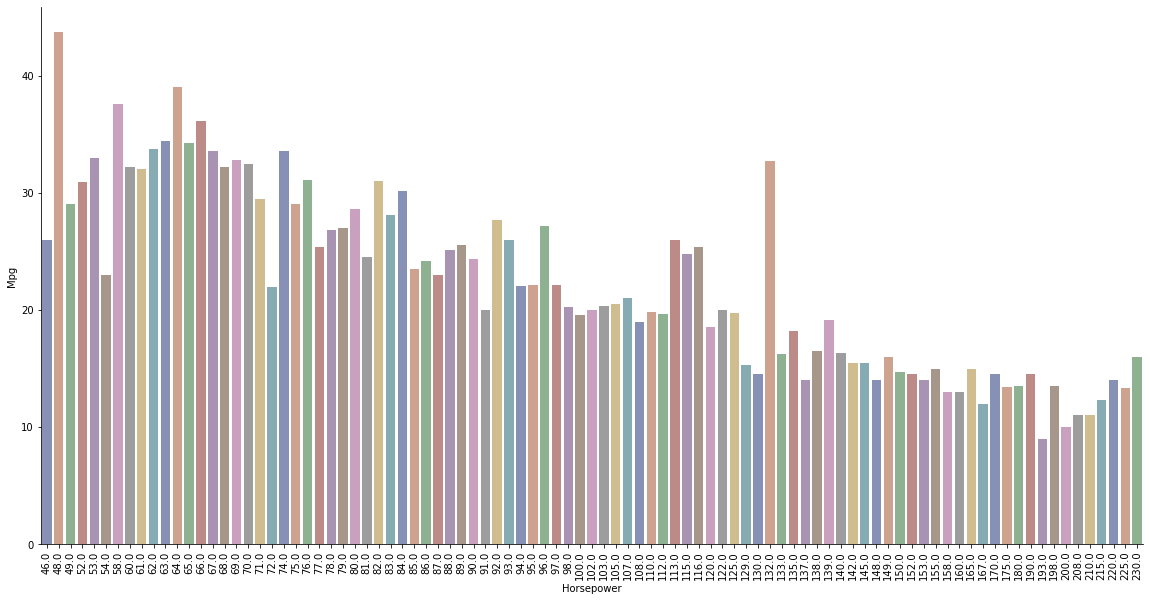

In [59]:
m = sns.catplot(x='horsepower', y='mpg', data=df, kind="bar", ci=None, palette="dark", aspect=2, alpha=.5, height=8)
m.set_axis_labels("Horsepower", "Mpg")
m.set_xticklabels(rotation=90)

Printing the number of instances for each unique horsepower

In [60]:
df['horsepower'].value_counts()

150.0    22
90.0     20
88.0     19
110.0    18
100.0    17
         ..
94.0      1
167.0     1
158.0     1
137.0     1
107.0     1
Name: horsepower, Length: 93, dtype: int64

There is a similar pattern and tendency with regards the relation of the mpg and the weight, however I did not keep the plot due to the fact there are only unique instances and the visual effect of the blurred labels. 

In [61]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_brand
0,15.0,8,350.0,165.0,3693,11.5,70,1,buick
1,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth
2,16.0,8,304.0,150.0,3433,12.0,70,1,amc
3,17.0,8,302.0,140.0,3449,10.5,70,1,ford
4,15.0,8,429.0,198.0,4341,10.0,70,1,ford


Observing statistical information relevant to each features.

In [62]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
count,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000
mean,23.285788,5.480620,195.060724,104.873385,2981.767442,15.475969,75.950904,1.571059
std,7.619271,1.705375,104.729578,38.426257,851.526364,2.655489,3.667554,0.806058
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,76.000000,2227.000000,13.750000,73.000000,1.000000
50%,22.400000,4.000000,151.000000,95.000000,2807.000000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,284.500000,127.000000,3625.000000,17.000000,79.000000,2.000000
max,44.600000,8.000000,455.000000,230.000000,5140.000000,23.500000,82.000000,3.000000


Selecting important features.

Filter method

Printing heatmap

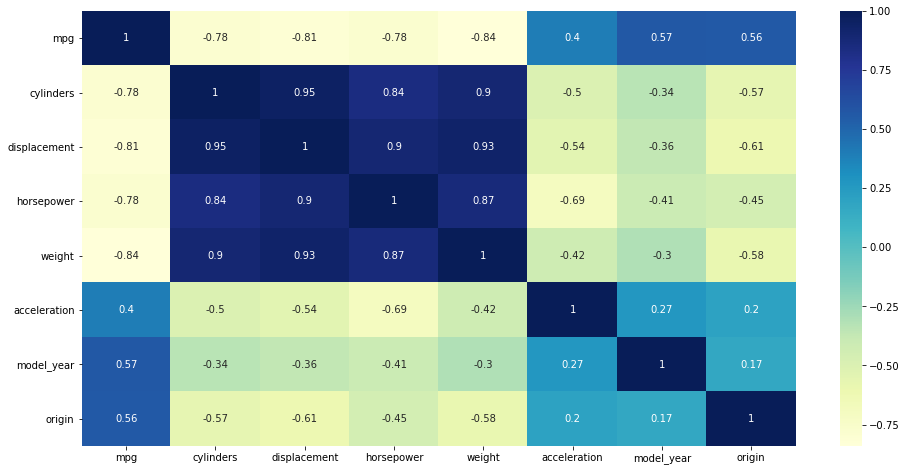

In [63]:
cor = df.corr()
plt.figure(figsize=(16,8))
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

Printing correlation with target variable

In [64]:
corr_y = abs(cor["mpg"])
highest_corr = corr_y[corr_y >0.5]
highest_corr.sort_values(ascending=True)

origin          0.562817
model_year      0.573279
horsepower      0.778933
cylinders       0.784448
displacement    0.810568
weight          0.840394
mpg             1.000000
Name: mpg, dtype: float64

Correlation of mpg with independent variables:
- Mpg is not highly (positively) correlated with any independent variables, however is has moderate (positive) correlation with model_year and origin. (notice these variables not directly related to the engine specification nor any property that would directly affect the performance) 
- Mpg has high correlation (negative) with cylinders, displacement, horsepower and weight. These represent the size/weight/engine power of the car. This suggest that cars having a given mpg rate is dependent on the value of those variables that are representing the properties of the car that would influence the performance. 

Making an observation on the result of my heatmap and also taking into consideration what my catplots pointed out, I can make a conclusion that those properties that are above mentioned and showed positive correlation are directly proportional with the level of mpg, therefore a newer model would increase the mpg of the car (according to my dataset).
I can also declare that the variables with the high level of negative correlation are inversely proportional with the rate of mpg, therefor according to my dataset if the weight or the performance of the car grows, would affect the rate of mpg negatively.

Correlation within independent variables:
- Many independent variables are highly correlated (look at the top-left part of matrix): cylinders, displacement, horsepower and weight are all measures of performance/weight, and are positively correlated.

Therefore, while I build my models, I will need to be conscious regarding the multicollinearity (linear models can be highly affected by multicollinearity).



Wrapper and Embedded methods for feature selection are more accurate and also as I have less features than 20, I can implement these. Although these are computationally expensive methods due to the small dataset it will not affect my work greatly and I shall get more accurate results. 

Wrapper method (Backward elimination and RFE)

Backward elimination

Using label encoder to transform categorical feature to numeric

In [65]:
lb_make = LabelEncoder()
df['car_brand'] = lb_make.fit_transform(df['car_brand'])

Splitting dataset to target variable and features

In [66]:
X = df.drop("mpg",1)
y = df["mpg"]  

Adding constant as it is necessary for the model

In [67]:
X_1 = sm.add_constant(X)
X_1.head()

,const,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_brand
0,1.0,8,350.0,165.0,3693,11.5,70,1,3
1,1.0,8,318.0,150.0,3436,11.0,70,1,25
2,1.0,8,304.0,150.0,3433,12.0,70,1,0
3,1.0,8,302.0,140.0,3449,10.5,70,1,13
4,1.0,8,429.0,198.0,4341,10.0,70,1,13


Calculating pvalues

In [68]:
model = sm.OLS(y, X_1).fit()

model.pvalues

const           2.342809e-03
cylinders       8.907749e-02
displacement    1.054450e-02
horsepower      1.102906e-01
weight          8.891680e-21
acceleration    6.942047e-01
model_year      5.576009e-40
origin          1.336058e-05
car_brand       1.024129e-01
dtype: float64

Creating loop to find important features using pvalues

In [69]:
cols = list(X.columns)
pmax = 1


while (len(cols) > 0):
    p = []                           
    X_1 = X[cols]                    
    X_1 = sm.add_constant(X_1)       
    model = sm.OLS(y,X_1).fit()      
    p = pd.Series(model.pvalues.values[1:], index = cols)  
    pmax = max(p)                                       
    feature_with_p_max = p.idxmax()             
    if(pmax > 0.05):
        cols.remove(feature_with_p_max)                     
    else:
        break

selected_features_BE = cols

print(selected_features_BE)

['weight', 'model_year', 'origin']


Backward elimination drastically reduced the number of features and only pointed at 3 features as important ones (weight, model_year, origin). 

RFE

In [70]:
model = LinearRegression()

rfe = RFE(model, 4)

X_rfe = rfe.fit_transform(X, y)  

model.fit(X_rfe,y)

print(rfe.support_)
print(rfe.ranking_)

[ True False False False  True  True  True False]
[1 4 2 5 1 1 1 3]


In the above model I used a random number 5 as the selection number for features, however to find the optimum number we should use a more appropriate method; therefore, I will utilise a loop what will select the optimum number with accuracy comparison. 

Creating loop to find important features by comparing thier RFE scores

In [71]:
nof_list=np.arange(1, 9)            
high_score=0

nof=0           
score_list =[]

for n in range(len(nof_list)):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)    
    model = LinearRegression()           
    rfe = RFE(model, nof_list[n])         
    X_train_rfe = rfe.fit_transform(X_train, y_train)    
    X_test_rfe = rfe.transform(X_test)                    
    model.fit(X_train_rfe, y_train)                      
    score = model.score(X_test_rfe, y_test)               
    score_list.append(score)                        
    if(score > high_score):                         
        high_score = score                          
        nof = nof_list[n]

print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

Optimum number of features: 8
Score with 8 features: 0.832075


Creating variable with all features

In [72]:
cols = list(X.columns)
cols

['cylinders',
 'displacement',
 'horsepower',
 'weight',
 'acceleration',
 'model_year',
 'origin',
 'car_brand']

Below we would make an attempt to find the best 8 features, however as we only have 8 it will not help with our progress.

Creating variable for list of relevant columns, initiating LinearRegression, setting and fitting RFE, fitting model and printing feature importance relevant to each columns

In [73]:
cols = list(X.columns)
model = LinearRegression()

rfe = RFE(model, 8)             

X_rfe = rfe.fit_transform(X, y)  

model.fit(X_rfe ,y)

top_8_features = pd.Series(rfe.support_,index = cols)

In [74]:
top_8_features

cylinders       True
displacement    True
horsepower      True
weight          True
acceleration    True
model_year      True
origin          True
car_brand       True
dtype: bool

Creating variable for features that are important and then printing them

In [75]:
selected_features_rfe = top_8_features[top_8_features == True].index

selected_features_rfe

Index(['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration',
       'model_year', 'origin', 'car_brand'],
      dtype='object')

As I highlighted, I run the above model with the 8 important features that was pointed out, however there was no feature reduction achieved as the dataset has 8 independent features. 

Embedded method

Utilizing LassoCV for the embedded feature selection

In [76]:
reg = LassoCV()

reg.fit(X, y)

print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" % reg.score(X,y))

coef = pd.Series(reg.coef_, index = X.columns)

Best alpha using built-in LassoCV: 5.438396
Best score using built-in LassoCV: 0.775460


Print number of variables kept and number of variables eliminated.

In [77]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 4 variables and eliminated the other 4 variables


Plotting feature importance

Text(0.5, 1.0, 'Feature importance using Lasso Model')

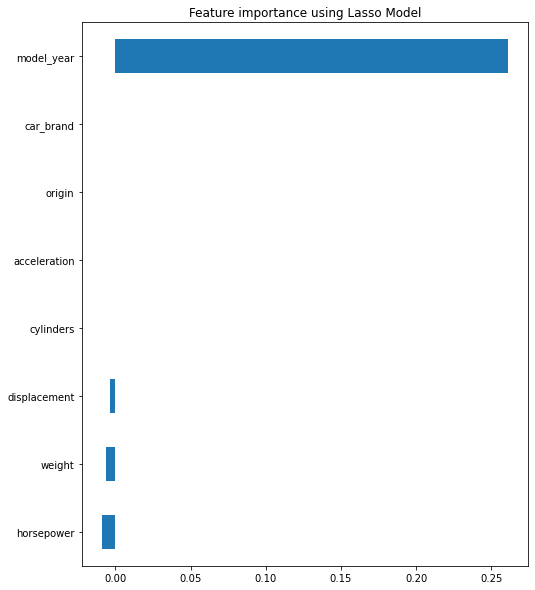

In [78]:
imp_coef = coef.sort_values()

matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)

imp_coef.plot(kind = "barh")

plt.title("Feature importance using Lasso Model")

The Lasso model eliminated 4 and kept another 4 features (model_year, displacement, weight, horsepower).

To choose the features for my models I am taking to consideration that filter method is less accurate than wrapper and embedded method, therefore I shall disregard its result here. I cannot consider the result of RFE either as it did not reduce my features. Backward elimination and the Lasso model made significant reductions and both kept the following features:
model_year and weight. 

Backward elimination had an additional feature as the origin and Lasso had an additional 2 as displacement and horsepower. Although I said I disregard the filter method, however I will be using the heatmap as an aid to make further decisions. Although origin has only moderate correlation with mpg, however so model_year and as it is not showing signs for multicollinearity, I will keep this too. I also made an observation with regards displacement and horsepower. I certainly will drop one due to their high correlation with each other. Although both showing high correlation with weight, I shall keep one of them what has the less and that is the horsepower. I made this decision with only a personal preference to have 2 features with positive correlation and 2 with negative correlation with mpg.



Creating new dataset with reduced number of features

In [79]:
df_resized = df[['mpg','weight','horsepower','model_year','origin']]

In [80]:
df_resized.head()

,mpg,weight,horsepower,model_year,origin
0,15.0,3693,165.0,70,1
1,18.0,3436,150.0,70,1
2,16.0,3433,150.0,70,1
3,17.0,3449,140.0,70,1
4,15.0,4341,198.0,70,1


                                           Linear Regression

Applying GridSearchCV and RandomizedSearchCV to find the best parameters

Splitting dataset and assigning model to lr

In [81]:
X001 = df_resized.drop(['mpg'], axis = 1)
y001 = df_resized['mpg']

lr = LinearRegression()

Generating hyperparameter values

In [82]:
fit_intercept=['True','False']
normalize=['True','False']
copy_X=['True','False']
positive=['True','False']

Declaring and defining hyperparameters using dictionary

In [83]:
hyperparameters = dict(copy_X = copy_X, fit_intercept = fit_intercept, normalize = normalize, positive = positive)

Printing parameters

In [84]:
print(lr.get_params().keys())

dict_keys(['copy_X', 'fit_intercept', 'n_jobs', 'normalize', 'positive'])


Calling LinearRegression, calling and fitting GridSearch and printing estimators

In [85]:
linearModelObj = linear_model.LinearRegression()

gridsearch = GridSearchCV(linearModelObj, hyperparameters)

best_gridsearch_result = gridsearch.fit(X001, y001)

print('Best estimator: ', best_gridsearch_result.best_estimator_)
print("Best Score: {:.4f}".format(best_gridsearch_result.best_score_))
print('Best Params: ', best_gridsearch_result.best_params_)

Best estimator:  LinearRegression(copy_X='True', fit_intercept='True', normalize='True',
                 positive='True')
Best Score: 0.1712
Best Params:  {'copy_X': 'True', 'fit_intercept': 'True', 'normalize': 'True', 'positive': 'True'}


Calling and fitting RandomizedSearchCV, then fitting model and printing estimators

In [86]:
randomizedsearch = RandomizedSearchCV(linearModelObj, hyperparameters)

best_model_randomsearch = randomizedsearch.fit(X001, y001)

print('Best estimator for randomsearchCV: ', best_model_randomsearch.best_estimator_)
print("Best Score for randomsearchCV: {:.4f}".format(best_model_randomsearch.best_score_))
print('Best Params for randomsearchCV: ', best_model_randomsearch.best_params_)

Best estimator for randomsearchCV:  LinearRegression(copy_X='False', fit_intercept='False', normalize='True',
                 positive='False')
Best Score for randomsearchCV: 0.1712
Best Params for randomsearchCV:  {'positive': 'False', 'normalize': 'True', 'fit_intercept': 'False', 'copy_X': 'False'}


Both models have very low best-scores, however bot pointed initially to the same hyperparameter values. Although as its name indicates RandomizedSearchCV can be showing different results with each unique run.

In [87]:
df_resized.head()

,mpg,weight,horsepower,model_year,origin
0,15.0,3693,165.0,70,1
1,18.0,3436,150.0,70,1
2,16.0,3433,150.0,70,1
3,17.0,3449,140.0,70,1
4,15.0,4341,198.0,70,1


        Creating and fitting Linear regression model with 2 selected features from the reduced dataset

In [88]:
features = df_resized.loc[:, ['weight','model_year']]
target = df_resized['mpg']
regression = LinearRegression(copy_X=False,fit_intercept=True,normalize=True,positive=False)
model = regression.fit(features, target)

Viewing intercept

In [89]:
model.intercept_

-12.558333087275514

Viewing coefficients

In [90]:
model.coef_

array([-0.00656929,  0.72984259])

Printing target value for our prediction

In [91]:
Target_Value = target[0]

Target_Value

15.0

Predicting target value

In [92]:
Predicted_Value = model.predict(features)[0]

Predicted_Value

14.27027444026486

In [93]:
Difference = (Predicted_Value - Target_Value)*-1

Difference

0.7297255597351402

The prediction is very close to our target value

Having another observation of the more significant coefficient, which is the model_year's

In [94]:
model.coef_[1]

0.7298425900518367

The coefficient above is ~0.73, what means is that with every additional year in the model year (if the model is newer with one year) the individual mpg will increase with 0.73, that’s more than an additional km per gallon!

                            Creating model with the same, but extended dataset 

Splitting dataset to prepare for model ceration with generalized hyperparameters

In [95]:
X = df_resized.drop(['mpg'], axis = 1)
y = df_resized['mpg']

Splitting dataset for training and testing and initiating model

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.29, random_state=0)
lr = LinearRegression(copy_X=False,fit_intercept=True,normalize=True,positive=False)

Fitting model

In [97]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=False, normalize=True)

Printing train and test accuracy

In [98]:
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.83
Test set score: 0.83


The accuracy for both training and testing is 83%. This is appropriate many times; however, it is not a very high score.

Partial Least Squares Model

Define cross-validation method, an array for MSE, a variable to store the number of instances/rows and calculating MSE

In [99]:
cv = RepeatedKFold(n_splits = 3, n_repeats = 3, random_state = 1)

mse = []                             
n   = len(X)                         

for i in np.arange(1, 6):
    pls = PLSRegression(n_components = i)
    score = -1 * model_selection.cross_val_score(pls, scale(X), y, cv = cv, scoring='neg_mean_squared_error').mean()
    mse.append(score)
    print(score)

11.878786723520754
11.17222465411265
10.424549009324858
10.357926816836173
10.357926816836173


Plotting MSE vs number of components

Text(0.5, 1.0, 'mpg')

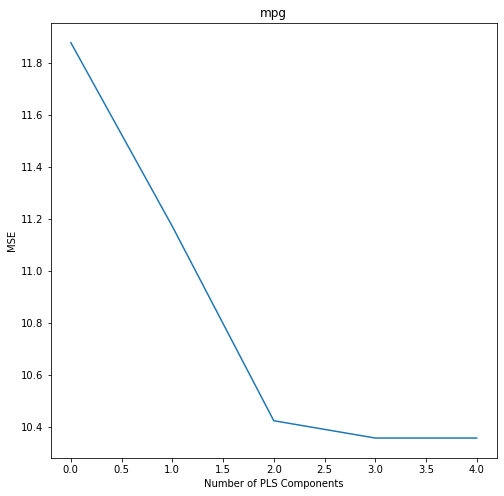

In [100]:
matplotlib.rcParams['figure.figsize'] = (8.0, 8.0)
plt.plot(mse)
plt.xlabel('Number of PLS Components')
plt.ylabel('MSE')
plt.title('mpg')

We are looking for a pls component number which is neither increasing nor decreasing, so some way is stable. We can see below 3 the MSE is decreasing and after 3 it seems there is a very slight increment, therefore I shall take the 3 as the right PLS component.

Final model to create prediction

In [101]:
pls = PLSRegression(n_components = 3)

pls.fit(scale(X_train), y_train)

np.sqrt(mean_squared_error(y_test, pls.predict(scale(X_test))))

3.116458586604067

The RMSE is what we got is 3.1164. This is the average deviation between the predicted and observed value of mpg in the testing set. I would consider this value as high and not satisfactory. In European standard it is 5 litre difference in 1.6km.

More distinct k-fold CV

In [102]:
df_resized.head()

,mpg,weight,horsepower,model_year,origin
0,15.0,3693,165.0,70,1
1,18.0,3436,150.0,70,1
2,16.0,3433,150.0,70,1
3,17.0,3449,140.0,70,1
4,15.0,4341,198.0,70,1


In [103]:
lm = LinearRegression()
folds = KFold(n_splits = 3, shuffle = True, random_state = 100)
scores = cross_val_score(lm, X_train, y_train, scoring='r2', cv=folds)
print(scores) 

[0.81099546 0.81983011 0.81468423]


Printing MSE and STD

In [104]:
scores = cross_val_score(lm, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
print(scores)
print("Folds: " + str(len(scores)) + ", MSE: " + str(np.mean(np.abs(scores))) + ", STD: " + str(np.std(scores)))

[ -7.24300062 -10.93103173 -10.15595504 -14.5651065  -11.01040191]
Folds: 5, MSE: 10.781099159085267, STD: 2.3367805840380815


MSE is 10.78 what is ~3.28 RMSE. This is about the same result as with the less distinct Kfold model above, with slightly wors result.

In [105]:
len(X_train.columns)

4

Hyperparameter tuning using Grid Search CV

In [106]:
folds = KFold(n_splits = 3, shuffle = True, random_state = 100)

hyper_params = [{'n_features_to_select': list(range(1, 5))}]


lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm)             

model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

model_cv.fit(X_train, y_train) 

Fitting 3 folds for each of 4 candidates, totalling 12 fits


GridSearchCV(cv=KFold(n_splits=3, random_state=100, shuffle=True),
             estimator=RFE(estimator=LinearRegression()),
             param_grid=[{'n_features_to_select': [1, 2, 3, 4]}],
             return_train_score=True, scoring='r2', verbose=1)

We can see that GridSearchCV pointed out that r2 score would give more accurate score than neg_mean_squared_error.

Cross-Validation result

In [107]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_features_to_select,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.007667,0.002055,0.004000,2.160348e-03,1,{'n_features_to_select': 1},0.405672,0.133719,0.328039,0.289144,0.114380,4,0.271414,0.383526,0.295754,0.316898,0.048149
1,0.002000,0.002160,0.000667,9.428531e-04,2,{'n_features_to_select': 2},0.590250,0.482199,0.576114,0.549521,0.047952,3,0.554313,0.600923,0.559979,0.571738,0.020766
2,0.003333,0.004714,0.000000,0.000000e+00,3,{'n_features_to_select': 3},0.755752,0.725452,0.746569,0.742591,0.012686,2,0.749967,0.761427,0.758649,0.756681,0.004881
3,0.000000,0.000000,0.010000,2.247832e-07,4,{'n_features_to_select': 4},0.810995,0.819830,0.814684,0.815170,0.003623,1,0.826794,0.824469,0.832171,0.827812,0.003226


Plotting CV results

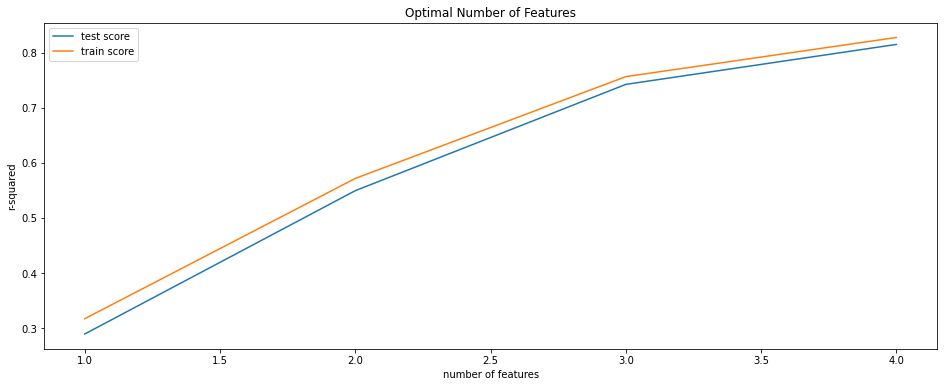

In [108]:
plt.figure(figsize=(16,6))

plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left')

We can observe that up to 3 features there is a higher rate of growth for r-squared, however after this rate flattens. Therefore, I will choose 3 as the optimal number of features. 

Final model with optimal number of features

In [109]:
n_features_optimal = 3

lm = LinearRegression(copy_X=False,fit_intercept=True,normalize=True,positive=False)
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=n_features_optimal)             
rfe = rfe.fit(X_train, y_train)

Predicting mpg from X_test

In [110]:
y_pred = lm.predict(X_test)
r2 = sklearn.metrics.r2_score(y_test, y_pred)
print(r2)

0.8252995599029698


(kaggle.com, n.d.)

We can observe that the mean test score with the optimal 3 features is ~83% what is about the same as the test score with the same training dataset. We can state that k-fold CV made a very good estimation of the test score.

                                                ANN

Keras Sequential model

Creating new dataset, what are converted to Numpy array to prepare dataset for scaling.

In [111]:
df_ann = df_resized.to_numpy()

Creating variables for both the features and the target variables.

In [112]:
x=df_ann[:,1:6] 
y=df_ann[:,0] 

Scaling data for the models to prevent large error gradient values so models will be more stable.

In [113]:
y=np.reshape(y, (-1,1))
scaler_x=MinMaxScaler()
scaler_y=MinMaxScaler()
print(scaler_x.fit(x))
xscale=scaler_x.transform(x)
print(scaler_y.fit(y))
yscale=scaler_y.transform(y)

MinMaxScaler()
MinMaxScaler()


Splitting data to 30% test and 70% training sets, with random state for reproductivity

In [114]:
X_train_ann, X_test_ann, y_train_ann, y_test_ann = train_test_split(xscale, yscale, test_size = 0.29, random_state = 10)

I built a sequential model as I have 1 input and 1 output tensor. My input layer has 12 neurons with 4 input dimensions of the features, my second layer had 8, the third 4 and the last 1, as I wanted only 1 output. I decided beside the number of neurons after multiple trial and what I noticed when I used the multiplication of my input dimension for the number of neurons, I tend to get better scores. 

The number of hidden layers was determined after I had experiment with the model regarding this. According to d4datascience.wordpress.com, there is a strong indication of the raise of the result rate when we buid the model with a greater number of hidden layers as many of the functions can converge what would result a higher level of abstraction (Ved, 2016). 

All my layers, except the last one has ReLU activation function. I decided beside this particular one as I find this is the most common one and less sensitive to vanishing gradients than the other ones (Brownlee, 2021).  To prevent exploding gradient problem I used some initial weighting set at my first layer as He_uniform. He distribution was originally designed for ReLU activation and gives more swift and stable training process (Alexander, 2020.).  However, I did not use activation function for my last layer as my task was regression to arbitrary values and in this case better performance can be achieved without it as applying something like sigmoid would give us a result to 0~1. (www.dlology.com, n.d.).  


In [115]:
model = Sequential()
model.add(Dense(12, input_dim=4, kernel_initializer='he_uniform', activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(layers.Dense(1))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 12)                60        
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 36        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 5         
Total params: 205
Trainable params: 205
Non-trainable params: 0
_________________________________________________________________


Compiling model

As I am building a regression model, I used mean squared error loss function and it will indicate how far the predicted values deviated from the target values (BGraf, 2018.). I set Adam as my optimizer as it is fast and can fix the high variance of the vanishing learning rate, although it is computationally expensive (Doshi, 2020). I used accuracy as my metrics just be able to make an observation on the training and testing accuracy.  

In [116]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy']) 

Fitting model

I decided on my number of epochs and batch size after some experiment. I set verbose to 0 as I was happy just to print out my accuracy and observe plots without having to see the complete process from epochs to epochs. I set my validation split to 0.2. Although train and test splitting is doing the same splitting as validation split does in Keras, however setting validation set would make the sets inaccessible after training but while training it would evaluate them. It is useful to monitor test accuracy during training (yousefnami, 2020).

In [117]:
history = model.fit(X_train_ann, y_train_ann, epochs=200, batch_size=20,  verbose=0, validation_split=0.2) #

Printing accuracy

In [118]:
_, accuracy = model.evaluate(X_train_ann, y_train_ann) 
_, accuracy1 = model.evaluate(X_test_ann, y_test_ann)
print('Training accuracy: %.2f' % ((1 - accuracy)*100))
print('Test accuracy: %.2f' % ((1 - accuracy1)*100))

4/4 [==============================] - 0s 2ms/step - loss: 0.0058 - accuracy: 0.0088
Training accuracy: 99.64
Test accuracy: 99.12


The accuracy score is very high for both training and testing. Also looking at both plots Model loss and Loss/Mean Squared Error below we can observe that at first the training data and the validation are right beside each other and also the training and testing loss/mse is also indicating the same tendency. It let us assume it is a very accurate model. 

Plotting training and validation loss agains the number of epochs

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


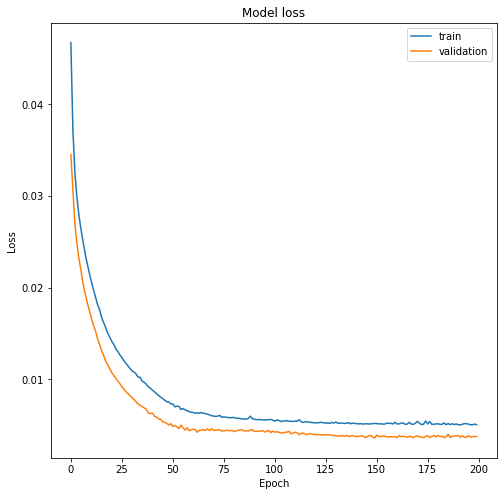

In [119]:
print(history.history.keys())
matplotlib.rcParams['figure.figsize'] = (8.0, 8.0)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

Plotting training and validation loss agains the rate of MSE

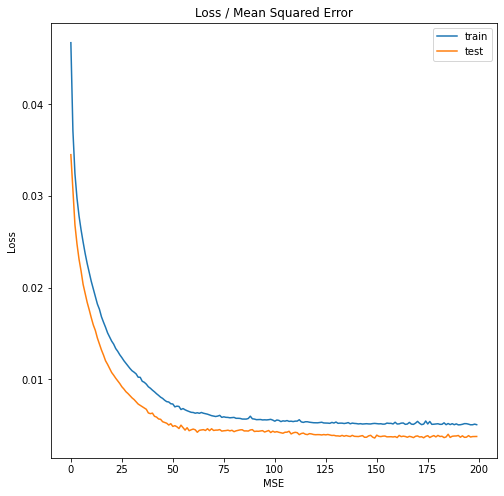

In [120]:
matplotlib.rcParams['figure.figsize'] = (8.0, 8.0)
plt.title('Loss / Mean Squared Error')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.ylabel('Loss')
plt.xlabel('MSE')
plt.legend()
plt.show()

Creating an array with the values of independent variables at index 9

In [121]:
Xnew = np.array([[3563, 170.0, 70, 1]])

Transforming the created array for the prediction and inputting to the prediction definition

In [122]:
Xnew= scaler_x.transform(Xnew)
ynew= model.predict(Xnew)

Observing predicted value in transformed format

In [123]:
ynew

array([[0.17426024]], dtype=float32)

Observing created array with transformed values

In [124]:
Xnew

array([[0.5528778 , 0.67391304, 0.        , 0.        ]])

Inverse transforming above values for interpretation

In [125]:
ynew = scaler_y.inverse_transform(ynew)
Xnew = scaler_x.inverse_transform(Xnew)

Printing predicted and target values

In [126]:
print("The predicted value is: ", ynew[0])
print('The target value that was predicted: ', df_resized.mpg[9])

The predicted value is:  [15.203665]
The target value that was predicted:  15.0


Creating an array with the values of independent variables at index 7

In [127]:
Xnew1 = np.array([[4425, 225.0, 70, 1]])

Transforming the created array for the prediction and inputting to the prediction definition

In [128]:
Xnew1= scaler_x.transform(Xnew1)
ynew1= model.predict(Xnew1)

Inverse transforming above values for interpretation

In [129]:
ynew1 = scaler_y.inverse_transform(ynew1)
Xnew1 = scaler_x.inverse_transform(Xnew1)

Printing predicted and target values

In [130]:
print("The predicted value is: ", ynew1[0])
print('The target value that was predicted: ', df_resized.mpg[7])

The predicted value is:  [13.77806]
The target value that was predicted:  14.0


The predictions are demonstrated with quite accurate results.

                                Baseline model with Kfold validation

I built very similar model for previous one with keras validation split. I kept my activation functions as ReLU, my loss as mse and my optimizer to Adam. I used random seed setting at the beginning for reproductivity. My reasons for this are matching with the earlier model. However, after some experiment I removed a hidden layer and I also set the weight with normal kernel initializer. I found that my results improved a lot with these tunings. 

For the evaluation I used the KerasRegresson, and my model had the same epochs and batch size as my earlier model. I used 3 folds for the Kfold, as after some experiment a realized from my scores that the optimal number of folds are the same that I have for the Kfold validation at the Linear Regression model.


In [131]:
seed(1)
set_seed(1)

def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(12, input_dim=4, kernel_initializer='normal', activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    model.compile(loss='mean_squared_error', optimizer='adam')
    
    return model
# evaluate model
estimator = KerasRegressor(build_fn=baseline_model, epochs=150, batch_size=20, verbose=0)
kfold = KFold(n_splits=3)
results = cross_val_score(estimator, x, y, cv=kfold)


print("MSE: %.2f STD: %.2f " % (abs(results.mean()), results.std()))

MSE: 10.35 STD: 2.89 


(Brownlee, 2016)

The model gives us 10.35 as MSE. From this we can easily calculate the RMSE, what is 3.217. If we reflecting this to the mpg, we can see that there is about 3.217miles~5km possible error when calculating mpg. I consider this as high when this can be after every gallon. 

                                            Comparing results

After having an observation on my both of my Linear Regression and Neuron Network model with Kfold validation, I can declare that the results are extremely close to each other. The Linear Regression model’s results were, with the more distinct Kfold gave MSE: 10.78 what is 3.28 RMSE and the STD was 2,33. The simple Kfold validation method had 3.114 RMSE. In the other hand the Neural Network gave MSE: 10.35 what is 3.21 RMSE and 2.89 STD. 

We can easily interpret the result by looking at on the RMSE values that I calculated form the MSE results. RMSE actually is the square root of the MSE and it is on the same scale as the target variable. We can see that our Linear Regression model with the simple Kfold validation approach gave a better result this time, even if it is just 1 tenth, therefore with this task we can declare that Linear Regression is the better approach.


Word count excluding titles, comments, references, code, description and descriptive comments: 2368

References:

- Alexander A. (2020.). Glorot vs He - weight initialization experiment. [online] Available at: https://www.kaggle.com/trolukovich/glorot-vs-he-weight-initialization-experiment [Accessed 3 Jul. 2021].
- ArnoldClark Newsroom. (n.d.). Everything you need to know about engine cylinders. [online] Available at: https://www.arnoldclark.com/newsroom/2331-everything-you-need-to-know-about-engine-cylinders [Accessed 28 Jun. 2021].
- Brownlee, J. (2021). How to Choose an Activation Function for Deep Learning. [online] Machine Learning Mastery. Available at: https://machinelearningmastery.com/choose-an-activation-function-for-deep-learning/ [Accessed 2 Jul. 2021].
- Brownlee, J. (2016). Regression Tutorial with the Keras Deep Learning Library in Python. [online] Machine Learning Mastery. Available at: https://machinelearningmastery.com/regression-tutorial-keras-deep-learning-library-python/ [Accessed 3 Jul. 2021].
- carwow.co.uk. (n.d.). What is mpg? How is it calculated? [online] Available at: https://www.carwow.co.uk/guides/running/what-is-mpg-0255#gref [Accessed 28 Jun. 2021].
- datatofish.com. (n.d.). Replace Characters in Strings in Pandas DataFrame - Data to Fish. [online] Available at: https://datatofish.com/replace-character-pandas-dataframe/ [Accessed 14 Jun. 2021].
- David McQuaid: ML2: KerasANN_cars, LossFunctions
- Doshi, S. (2020). Various Optimization Algorithms For Training Neural Network. [online] Medium. Available at: https://towardsdatascience.com/optimizers-for-training-neural-network-59450d71caf6 [Accessed 3 Jul. 2021].
- Dr. Muhammad Iqbal: Data exploration and preparation, Tutorial 9; ML1: Case Study TeclovCar Price Prediction, Tutorial 5, Tutorial 10. 
- Heaton J. (2019). Using K-Fold Cross Validation with Keras (5.2). [online] Available at: https://www.youtube.com/watch?v=maiQf8ray_s [Accessed 2 Jul. 2021].
- kaggle.com. (n.d.). Cross-Validation with Linear Regression. [online] Available at: https://www.kaggle.com/jnikhilsai/cross-validation-with-linear-regression. [Accessed 30 Jun. 2021].
- Math Study Strategies Learning Center Math for Automotives Displacement of a Piston. (n.d.). [online] . Available at: https://www.avc.edu/sites/default/files/studentservices/lc/math/piston_displacement.pdf [Accessed 28 Jun. 2021].
- Nelson D. (2021). Seaborn box plot tutorial and examples. [online] Available at: https://stackabuse.com/seaborn-box-plot-tutorial-and-examples [Accessed 27 Jun. 2021].
- Python and R Tips. (2018). How to Split a Column into Two Columns in Pandas? [online] Available at: https://cmdlinetips.com/2018/11/how-to-split-a-text-column-in-pandas/ [Accessed 14 Jun. 2021].
- Rajat Sharma (2019). Skewed Data: A problem to your statistical model. [online] Medium. Available at: https://towardsdatascience.com/skewed-data-a-problem-to-your-statistical-model-9a6b5bb74e37. [Accessed 27 Jun. 2021]
- Toyota Canada Inc (2019). What is Horsepower and Why Does it Matter? [online] Toyota Canada. Available at: https://www.toyota.ca/toyota/en/connect/3887/what-is-horsepower [Accessed 30 Jun. 2021].
- Ved (2016). How to improve performance of Neural Networks. [online] d4datascience.wordpress.com. Available at: https://d4datascience.wordpress.com/2016/09/29/fbf/ [Accessed 3 Jul. 2021].
- www.dlology.com. (n.d.). How to choose Last-layer activation and loss function | DLology. [online] Available at: https://www.dlology.com/blog/how-to-choose-last-layer-activation-and-loss-function/ [Accessed 3 Jul. 2021].
- www.web-formulas.com. (n.d.). Determine the Acceleration of a Car. [online] Available at: https://www.web-formulas.com/Physics_Formulas/Determine_the_Acceleration_of_a_Car.aspx [Accessed 28 Jun. 2021].
- yousefnami (2020). Addressing the difference between Keras’ validation_split and sklearn’s train_test_split(). [online] Medium. Available at: https://towardsdatascience.com/addressing-the-difference-between-keras-validation-split-and-sklearn-s-train-test-split-a3fb803b733 [Accessed 3 Jul. 2021].
